<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:**


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
# Ваш код здесь
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import Normalizer


# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [2]:
# Ваш код здесь
transactions = pd.read_csv('transactions.csv', sep=';')  
transactions.head(5)

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099


In [3]:
transactions.shape

(2282467, 4)

In [4]:
gender = pd.read_csv('gender.csv')  
gender.head(5)

,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [5]:
# Ваш код здесь
df = pd.DataFrame()
df['user_id'] = transactions['user_id'].unique()

df = pd.merge(df, transactions.groupby('user_id').sum(), on='user_id')
df = pd.merge(df, transactions.groupby('user_id').mean(), on='user_id')
df = pd.merge(df, transactions.groupby('user_id').std(), on='user_id').fillna(0)
df = pd.merge(df, gender, on='user_id', how='inner')
df.columns = ['user_id', 'value_sum', 'value_mean', 'value_std', 'gender']

df

,user_id,value_sum,value_mean,value_std,gender
0,39026145,2139091.217,2371.498023,551.233497,1.0
1,52220754,1009593.145,2112.119550,669.914482,1.0
2,79780256,111487.283,1922.194534,883.867908,1.0
3,1645333,663686.740,1896.247829,847.437126,0.0
4,5524414,364074.046,1867.046390,768.072248,0.0
...,...,...,...,...,...
8351,46377895,1572.142,1572.142000,0.000000,0.0
8352,98330637,1122.958,1122.958000,0.000000,1.0
8353,72896314,160892.669,1547.044894,777.407328,1.0
8354,63879297,72385.872,2680.958222,141.242612,1.0


### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [6]:
# Ваш код 

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [7]:
# Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df.gender, test_size=0.2, random_state=123)

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [194]:
# Ваш код здесь
clf = LogisticRegression().fit(X_train, y_train)
clf.predict_proba(X_train)[:, 1:].reshape(-1)

array([0.44634199, 0.44150944, 0.44638552, ..., 0.44584882, 0.44924845,
       0.44550933])

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [200]:
# Ваш код здесь
y_pred = clf.predict_proba(X_test)[:, -1]
print('ROC_AUC', roc_auc_score(y_test, y_pred))
print('accuracy', accuracy_score(y_test, clf.predict(X_test)))
t = 0.5
y_pred = 1*(y_pred >= t) 
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

ROC_AUC 0.5716000092646744
accuracy 0.5520334928229665
precision 0.0
recall 0.0


### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__ Наблюдаем баланс классов. Судя по accuracy, алгоритм относит почти все значения к метке 0. Это видно и по ROC_AUC (площадь под кривой равная 0,5 свидетельствует об наихудшей модели предсказаний). Точность и полнота определения метки 1 равны 0, так как модель отнесла все к другому классу. Получается, мы обучили константную модель. И не удивительно, ведь мы передали модели только данные о стоимости покупок.

In [202]:
gender.groupby(by='gender')['user_id'].count()

gender
0.0    4651
1.0    3749
Name: user_id, dtype: int64

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [10]:
# Ваш код здесь
piv_table = pd.pivot_table(transactions, values='value', index=['user_id'], 
                    columns=['type'], aggfunc=np.sum, fill_value=0)
piv_table

type,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [11]:
piv_table = pd.merge(piv_table, gender, on='user_id', how='inner')

In [12]:
# Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(piv_table[piv_table.columns[:-1]], piv_table['gender'], test_size=0.2, random_state=123)

In [13]:
# Ваш код здесь
clf = LogisticRegression().fit(X_train, y_train)
clf.predict_proba(X_train)[:, 1:].reshape(-1)

array([0.41750984, 0.31406807, 0.4339142 , ..., 0.39574283, 0.61364441,
       0.56294945])

In [14]:
# Ваш код здесь
y_pred = clf.predict_proba(X_test)[:, -1]
print('ROC_AUC', roc_auc_score(y_test, y_pred))
print('accuracy', accuracy_score(y_test, clf.predict(X_test)))
t = 0.5
y_pred = 1*(y_pred >= t) 
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

ROC_AUC 0.6921059183897996
accuracy 0.6495215311004785
precision 0.6951219512195121
recall 0.3820375335120643


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__ Качество модели значительно изменилось. Точность предсказаний 1го класса дает хороший результат 70%. Как следовало и ожидать, полнота при этом низкая - лишь 38%. Это произошло за счет продуманной подготовки данных. В этом случае мы учитывали категориальный признак - категорию купленного товара, он дает большое понимание о гендере покупателя.

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [15]:
# Ваш код здесь
col = piv_table.columns

scaler = Normalizer()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [54]:
print(LogisticRegression().get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [55]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score

model_lr = LogisticRegression()
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

searcher_lr = GridSearchCV(model_lr, [{"solver": solver}],
                        scoring="roc_auc", cv=4, n_jobs=-1)
searcher_lr.fit(X_train, y_train)

best_solver = searcher_lr.best_params_["solver"]

Best solver: lbfgs


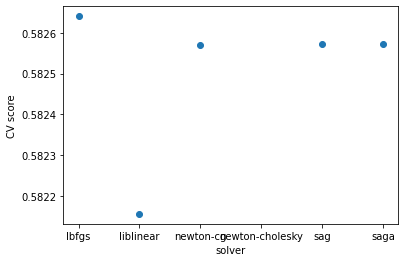

In [48]:
# Ваш код здесь
print("Best solver:", best_solver)

plt.scatter(solver, searcher_lr.cv_results_["mean_test_score"])
plt.xlabel("solver")
plt.ylabel("CV score");

In [50]:
model_lr = LogisticRegression(solver='lbfgs')

alphas = np.logspace(-2, 4, 20)

searcher_lr = GridSearchCV(model_lr, [{"C": alphas}],
                        scoring="roc_auc", cv=4, n_jobs=-1)
searcher_lr.fit(X_train, y_train)

best_alpha = searcher_lr.best_params_["C"]

Best alpha = 2335.7215


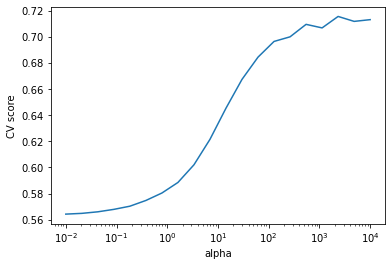

In [51]:
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, searcher_lr.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score");

Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [53]:
# Ваш код здесь
model_lr = LogisticRegression(C=2335.7215, solver='lbfgs')

clf = model_lr.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, -1]
print('ROC_AUC', roc_auc_score(y_test, y_pred))
print('accuracy', accuracy_score(y_test, clf.predict(X_test)))
t = 0.5
y_pred = 1*(y_pred >= t) 
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

ROC_AUC 0.7136491815239231
accuracy 0.6728468899521531
precision 0.642346208869814
recall 0.6018766756032171


Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__: Улучшение качества благодаря нормализации данных и подбору параметров на несколько процентов. Более того, заметно увеличилось значение полноты верных ответов модели. Кросс-валидация нужна для подбора гиперпаарметров, не участвует в обучении, а помогает выбрать наилучшую модель. По тестовой выборке надежно и независимо оцениваем конечное качество модели.

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

best t: 0.15000000000000002


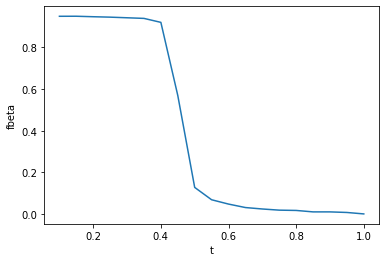

In [87]:
# Ваш код здесь
model_lr = LogisticRegression(C=2335.7215, solver='lbfgs')

clf = model_lr.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, -1]
tt = np.linspace(0.1, 1, 19)
fbetas = [fbeta_score(y_test, 1*(y_pred >= t), beta=5) for t in tt]

print('best t:', tt[fbetas.index(max(fbetas))])
plt.plot(tt, fbetas)
plt.xlabel("t")
plt.ylabel("fbeta");

In [171]:
model_lr = LogisticRegression(C=2335.7215, solver='lbfgs')

clf = model_lr.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, -1]
print('ROC_AUC', roc_auc_score(y_test, y_pred))
print('accuracy', accuracy_score(y_test, clf.predict(X_test)))
t = 0.15
y_pred = 1*(y_pred >= t) 
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

ROC_AUC 0.7187534380627565
accuracy 0.5885167464114832
precision 0.4472573839662447
recall 0.9946380697050938


## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [134]:
# Ваш код здесь
param = pd.DataFrame({'columns': col[:-1], 'coef': model_lr.coef_[0]})
print('Увеличивают вероятность метки 0')
param.sort_values('coef', ascending=True, ignore_index=True).head(10)['columns']

Увеличивают вероятность метки 0


0                                   Магазины косметики
1                                               Аптеки
2            Прямой маркетинг — торговля через каталог
3                    Магазины мужской и женской одежды
4    Профессиональные услуги, нигде ранее не класси...
5                                     Обувные магазины
6                                Одежда для всей семьи
7                                  Поставщики провизии
8    Магазины офисных, школьных принадлежностей, ка...
9                                          Зоомагазины
Name: columns, dtype: object

In [137]:
# Ваш код здесь
print('Увеличивают вероятность метки 1')
param.sort_values('coef', ascending=False, ignore_index=True).head(10)['columns']

Увеличивают вероятность метки 1


0                              Станции техобслуживания
1                                 Магазины звукозаписи
2                         Транзакции по азартным играм
3                          Галереи/учреждения видеоигр
4                        Лесо- и строительный материал
5                            Автозапчасти и аксессуары
6                    Продажа электронного оборудования
7              Компьютерная сеть/информационные услуги
8    Телекоммуникационное оборудование, включая про...
9    Не-финансовые институты — иностранная валюта, ...
Name: columns, dtype: object

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

In [149]:
# Ваш код здесь
model_rf = RandomForestClassifier(n_estimators=50)

model_rf.fit(X_train, y_train)

p_pred = model_rf.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])

0.8081937359220379

In [163]:
df1 = pd.DataFrame([], columns=['depth', 'split', 'n_est', 'roc_auc'])
scorer = make_scorer(roc_auc_score)

n_est = range(20, 100, 20)
depth = range(10, 30, 5)
splitt = range(10, 20, 2)

for n in n_est:
    for d in depth:
        for s in splitt:
            clf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s)
            roc = cross_val_score(clf, X_train, y_train, cv=4, scoring=scorer).mean()
            df1 = df1.append([{'depth': d, 'split': s, 'n_est': n, 'roc_auc': roc}])
        
df1[df1['roc_auc']==df1['roc_auc'].max()]

,depth,split,n_est,roc_auc
0,25,12,80,0.741981


In [211]:
clf = RandomForestClassifier(n_estimators=80, max_depth=25, min_samples_split=12)
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, -1]
print('ROC_AUC', roc_auc_score(y_test, y_pred))
print('accuracy', accuracy_score(y_test, clf.predict(X_test)))
t = 0.15
y_pred = 1*(y_pred >= t) 
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

ROC_AUC 0.8230056340801046
accuracy 0.7386363636363636
precision 0.4808565866320571
recall 0.9932975871313673


Удалось добиться показателелей повышения ROC_AUC более чем на 10%, почти 100% полноты 1 класса, пусть и с невысокой тоностью (как требовалось в предыдущем пункте), а также неплохого значения accuracy. Это удалось с использованием классификатора случайного леса и подбором его гиперпараметров.